# **Guessing Prices Pizza by Diameter, Topping, and Many more**

This Machine Learning model inspired by **YouTube** channel names **indonesia_belajar**, and i modified this model with more data.

note : sorry if my English typing is bad, hopefully you guys can understand.

# **Workflow**

1. Data Collection
2. Data Cleaning & Checking
3. Encode Data
3. Visualize Data & Checking
4. Splitting Data
5. Training Model Using XGBRegressor
6. Evaluate Model
7. Prediction

# **Import Libraries**

import the module that we want to use for this research.

In [1]:
import pandas as pd
pd.set_option('display.width', 100)
pd.set_option('display.max_columns', 8)
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/pizza-price-prediction/pizza_v1.csv


# **Import The Dataset**

import the dataset

note : this dataset is made by me after collecting some information about the price of pizza and many more on internet, and hopefully this dataset useful for you guys, sorry if i had a mistake in spelling some words, thanks in advance.

you guys can check it.

In [2]:
dataPizza = pd.read_csv('../input/pizza-price-prediction/pizza_v1.csv')

# **Cleaning & Checking The Dataset**

we must check the data every time we want to make a model, because this is the important thing, if you suddenly meet a bad dataset, wether you want it or not, you must clean the dataset. since we use my dataset, i guarantee the data is 100% clean and have a non null data, and we can just focus in encoding the data since our data is categorical. 

In [3]:
# Checking the first 5 rows of data
dataPizza.head()

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese
0,A,"Rp235,000",22.0,chicken,double_signature,jumbo,yes,yes
1,A,"Rp198,000",20.0,papperoni,double_signature,jumbo,yes,yes
2,A,"Rp120,000",16.0,mushrooms,double_signature,reguler,yes,yes
3,A,"Rp155,000",14.0,smoked beef,double_signature,reguler,yes,no
4,A,"Rp248,000",18.0,mozzarella,double_signature,jumbo,yes,no


In [4]:
# Checking the last 5 rows of data
dataPizza.tail()

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese
124,E,"Rp39,000",8.5,tuna,spicy tuna,small,yes,yes
125,E,"Rp72,000",12.0,tuna,spicy tuna,medium,yes,yes
126,E,"Rp99,000",14.0,tuna,spicy tuna,large,yes,yes
127,E,"Rp44,000",8.5,meat,BBQ_meat_fiesta,small,yes,no
128,E,"Rp78,000",12.0,meat,BBQ_meat_fiesta,medium,no,no


In [5]:
# Getting the information about the dataset
dataPizza.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   company       129 non-null    object 
 1   price_rupiah  129 non-null    object 
 2   diameter      129 non-null    float64
 3   topping       129 non-null    object 
 4   variant       129 non-null    object 
 5   size          129 non-null    object 
 6   extra_sauce   129 non-null    object 
 7   extra_cheese  129 non-null    object 
dtypes: float64(1), object(7)
memory usage: 8.2+ KB


In [6]:
# Cleaning Price Data
price = []

for item in dataPizza['price_rupiah']:
    price += [float(item.replace('Rp', '').replace(',', ''))]
    
dataPizza['price_rupiah'] = price

In [7]:
# Seeing the categorical data
dataPizza.loc[:, ['company', 'topping', 'variant', 'size', 'extra_sauce', 'extra_cheese']]

,company,topping,variant,size,extra_sauce,extra_cheese
0,A,chicken,double_signature,jumbo,yes,yes
1,A,papperoni,double_signature,jumbo,yes,yes
2,A,mushrooms,double_signature,reguler,yes,yes
3,A,smoked beef,double_signature,reguler,yes,no
4,A,mozzarella,double_signature,jumbo,yes,no
...,...,...,...,...,...,...
124,E,tuna,spicy tuna,small,yes,yes
125,E,tuna,spicy tuna,medium,yes,yes
126,E,tuna,spicy tuna,large,yes,yes
127,E,meat,BBQ_meat_fiesta,small,yes,no


# **Encode**

we need to encode the data since this data is a categorical data, and i'm using LabelEncoder here, since this data have a lot of categorical data.

In [8]:
labelEncoder = LabelEncoder()

In [9]:
# Accommodate data into dataVariables
data = dataPizza

# Encode the object data to type int
for e in data.columns:
    if data[e].dtype == 'object':
        labelEncoder.fit(list(data[e].values))
        data[e] = labelEncoder.transform(data[e].values)

        # Change the data type to float
        for i in data.columns:
            if data[i].dtype == 'int':
                data[i] = data[i].astype('float64')

                # Accommodate the data that has been changed
                dataPizza = data

In [10]:
# Getting the statistical info
dataPizza.describe()

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese
count,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000
mean,2.046512,87151.162791,12.976744,5.294574,8.155039,2.868217,0.589147,0.666667
std,1.435381,44706.097732,3.272674,3.204984,5.265527,1.470437,0.493907,0.473242
min,0.000000,23500.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,51000.000000,12.000000,2.000000,4.000000,2.000000,0.000000,0.000000
50%,2.000000,78000.000000,12.000000,5.000000,6.000000,3.000000,1.000000,1.000000
75%,3.000000,105000.000000,14.000000,9.000000,13.000000,4.000000,1.000000,1.000000
max,4.000000,248000.000000,22.000000,11.000000,19.000000,5.000000,1.000000,1.000000


**Coefficient of Variation**

The coefficient of variation is a measure of variance that can be used to compare a data distribution that has different units.

* The higher the Coefficient of Variation = the wider the data you have compared to the average data (more difficult to predict)
* The Lower Coefficient of Variation = The narrower the data you have compared to the Average data (Easier to predict)

In [11]:
# Coefficient of Variation Company
covCompany = ((dataPizza['company'].std()/dataPizza['company'].mean()) * 100)
print(f'Coefficient Of Variation Company : {covCompany}%')

# Coefficient of Variation Price
covPrice = ((dataPizza['price_rupiah'].std()/dataPizza['price_rupiah'].mean()) * 100)
print(f'Coefficient Of Variation Price : {covPrice}%')

# Coefficient of Variation Diameter
covDiameter = ((dataPizza['diameter'].std()/dataPizza['diameter'].mean()) * 100)
print(f'Coefficient Of Variation Diameter : {covDiameter}%')

# Coefficient of Variation Topping
covTopping = ((dataPizza['topping'].std()/dataPizza['topping'].mean()) * 100)
print(f'Coefficient Of Variation Topping : {covTopping}%')

# Coefficient of Variation Size
covSize = ((dataPizza['size'].std()/dataPizza['size'].mean()) * 100)
print(f'Coefficient Of Variation Size : {covSize}%')

# Coefficient of Variation Ext Sauce
covExtSauce = ((dataPizza['extra_sauce'].std()/dataPizza['extra_sauce'].mean()) * 100)
print(f'Coefficient Of Variation Sauce : {covExtSauce}%')

# Coefficient of Variation Ext Cheese
covExtCheese = ((dataPizza['extra_cheese'].std()/dataPizza['extra_cheese'].mean()) * 100)
print(f'Coefficient Of Variation Cheese : {covExtCheese}%')

Coefficient Of Variation Company : 70.13795484040163%
Coefficient Of Variation Price : 51.29719019276373%
Coefficient Of Variation Diameter : 25.21952768274302%
Coefficient Of Variation Topping : 60.53337574131802%
Coefficient Of Variation Size : 51.266588560481175%
Coefficient Of Variation Sauce : 83.83415842257293%
Coefficient Of Variation Cheese : 70.98635432250336%


as we can see in the output above, the coefficient of price is low than the mean/average of data, it's mean we are ready to rock and roll.

In [12]:
# Make a correlation data to knowing Value Strength and Direction of Linear Relationship
correlation = dataPizza.corr()
correlation

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese
company,1.000000,-0.300033,-0.182710,0.002093,-0.109497,0.021434,-0.038954,0.034503
price_rupiah,-0.300033,1.000000,0.826977,-0.077875,0.130395,-0.551606,0.083859,0.011817
diameter,-0.182710,0.826977,1.000000,-0.178475,0.193343,-0.836722,-0.063957,0.055488
topping,0.002093,-0.077875,-0.178475,1.000000,0.255129,0.145894,0.042505,-0.012019
variant,-0.109497,0.130395,0.193343,0.255129,1.000000,-0.255651,-0.029388,0.268582
size,0.021434,-0.551606,-0.836722,0.145894,-0.255651,1.000000,0.226068,-0.119754
extra_sauce,-0.038954,0.083859,-0.063957,0.042505,-0.029388,0.226068,1.000000,-0.089131
extra_cheese,0.034503,0.011817,0.055488,-0.012019,0.268582,-0.119754,-0.089131,1.000000


# **Z-score**

Standard Score or Z-score with a value less than –3 or more than +3 indicates that the data value is an extreme value, and to determines how much distance a value (from set sample observations) is to its average in standard deviation units, using Z-score

In [13]:
# Test Value 1
test1 = (dataPizza['price_rupiah'].max() + float(20000))

# Test Value 2
test2 = (dataPizza['price_rupiah'].min() - float(3500))

# Test Value 3
test3 = ((dataPizza['price_rupiah'].max() / dataPizza['price_rupiah'].min()) + float(50000))

# Test Value 4
test4 = ((dataPizza['price_rupiah'].max() / dataPizza['price_rupiah'].min()) - float(50000))


# Standard Score Test 1
standardScore1 = ((test1 - dataPizza['price_rupiah'].mean()) / dataPizza['price_rupiah'].std())
print(f'Z-scores 1 : {standardScore1}')

# Standard Score Test 2
standardScore2 = ((test2 - dataPizza['price_rupiah'].mean()) / dataPizza['price_rupiah'].std())
print(f'Z-scores 2 : {standardScore2}')

# Standard Score Test 3
standardScore3 = ((test3 - dataPizza['price_rupiah'].mean()) / dataPizza['price_rupiah'].std())
print(f'Z-scores 3 : {standardScore3}')

# Standard Score Test 4
standardScore4 = ((test4 - dataPizza['price_rupiah'].mean()) / dataPizza['price_rupiah'].std())
print(f'Z-scores 4 : {standardScore4}')

Z-scores 1 : 4.045283448661596
Z-scores 2 : -1.5020582470276294
Z-scores 3 : -0.8307727912621121
Z-scores 4 : -3.0676041201690576


the output above looks nice, we have test our data inside and the out site of data.

In [14]:
# Checking the structure of the data
dataPizza.sample(2, random_state=1).T

,122,104
company,4.0,4.0
price_rupiah,83000.0,83000.0
diameter,17.0,17.0
topping,2.0,2.0
variant,15.0,15.0
size,0.0,0.0
extra_sauce,0.0,0.0
extra_cheese,1.0,1.0


# **Visualize  The Data**

the first think we have to do is visualize the data, because from there we can choose which way is good to this dataset.

In [15]:
# Setting sns theme
sns.set_theme(color_codes=True, style='darkgrid', palette='deep', font='sans-serif')

[]

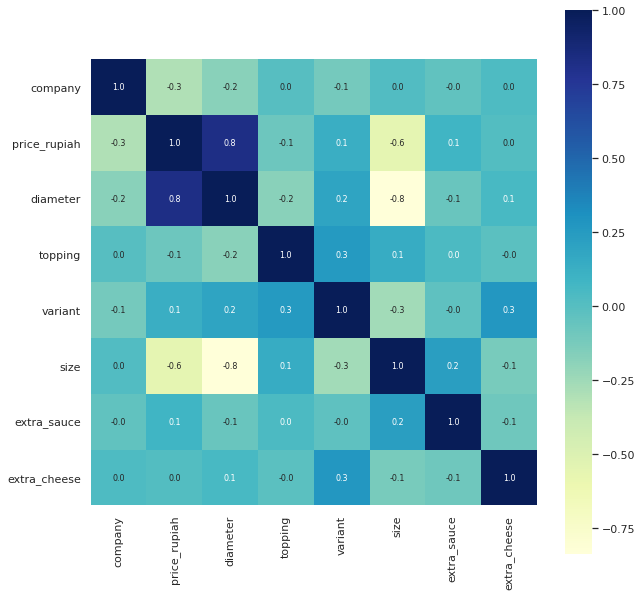

In [16]:
# Constructing a heatmap to understand the correlation
plt.figure(figsize=(10, 10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size': 8}, cmap='YlGnBu')
plt.plot()

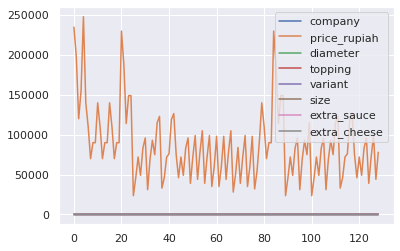

In [17]:
dataPizza.plot()
plt.show()

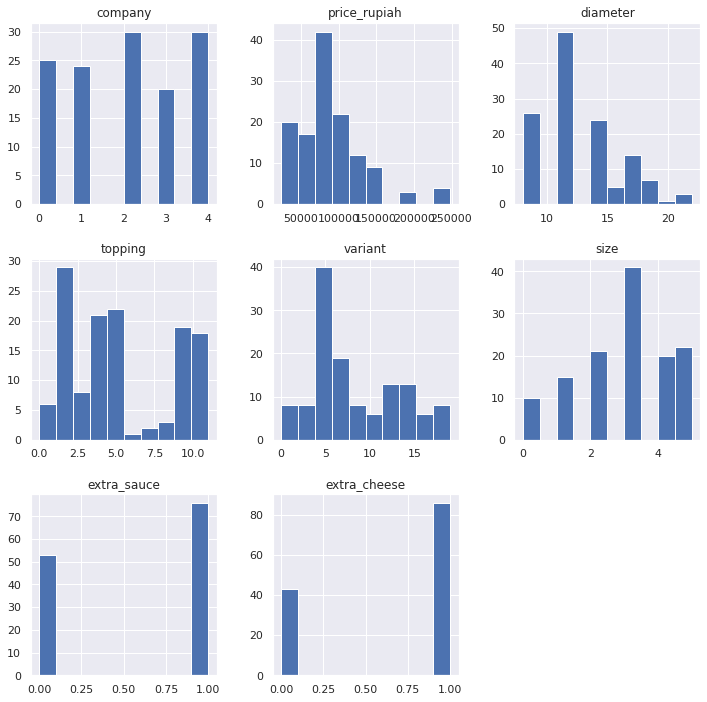

In [18]:
dataPizza.hist(figsize=(12,12))
plt.show()

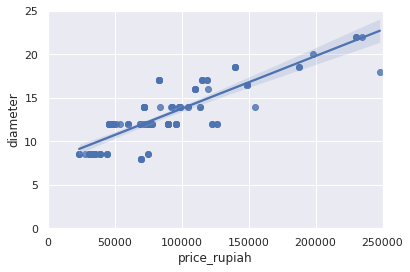

In [19]:
sns.regplot(x=dataPizza.price_rupiah, y=dataPizza.diameter, data=dataPizza)
plt.xlim(0, 250000)
plt.ylim(0, 25)
plt.show()

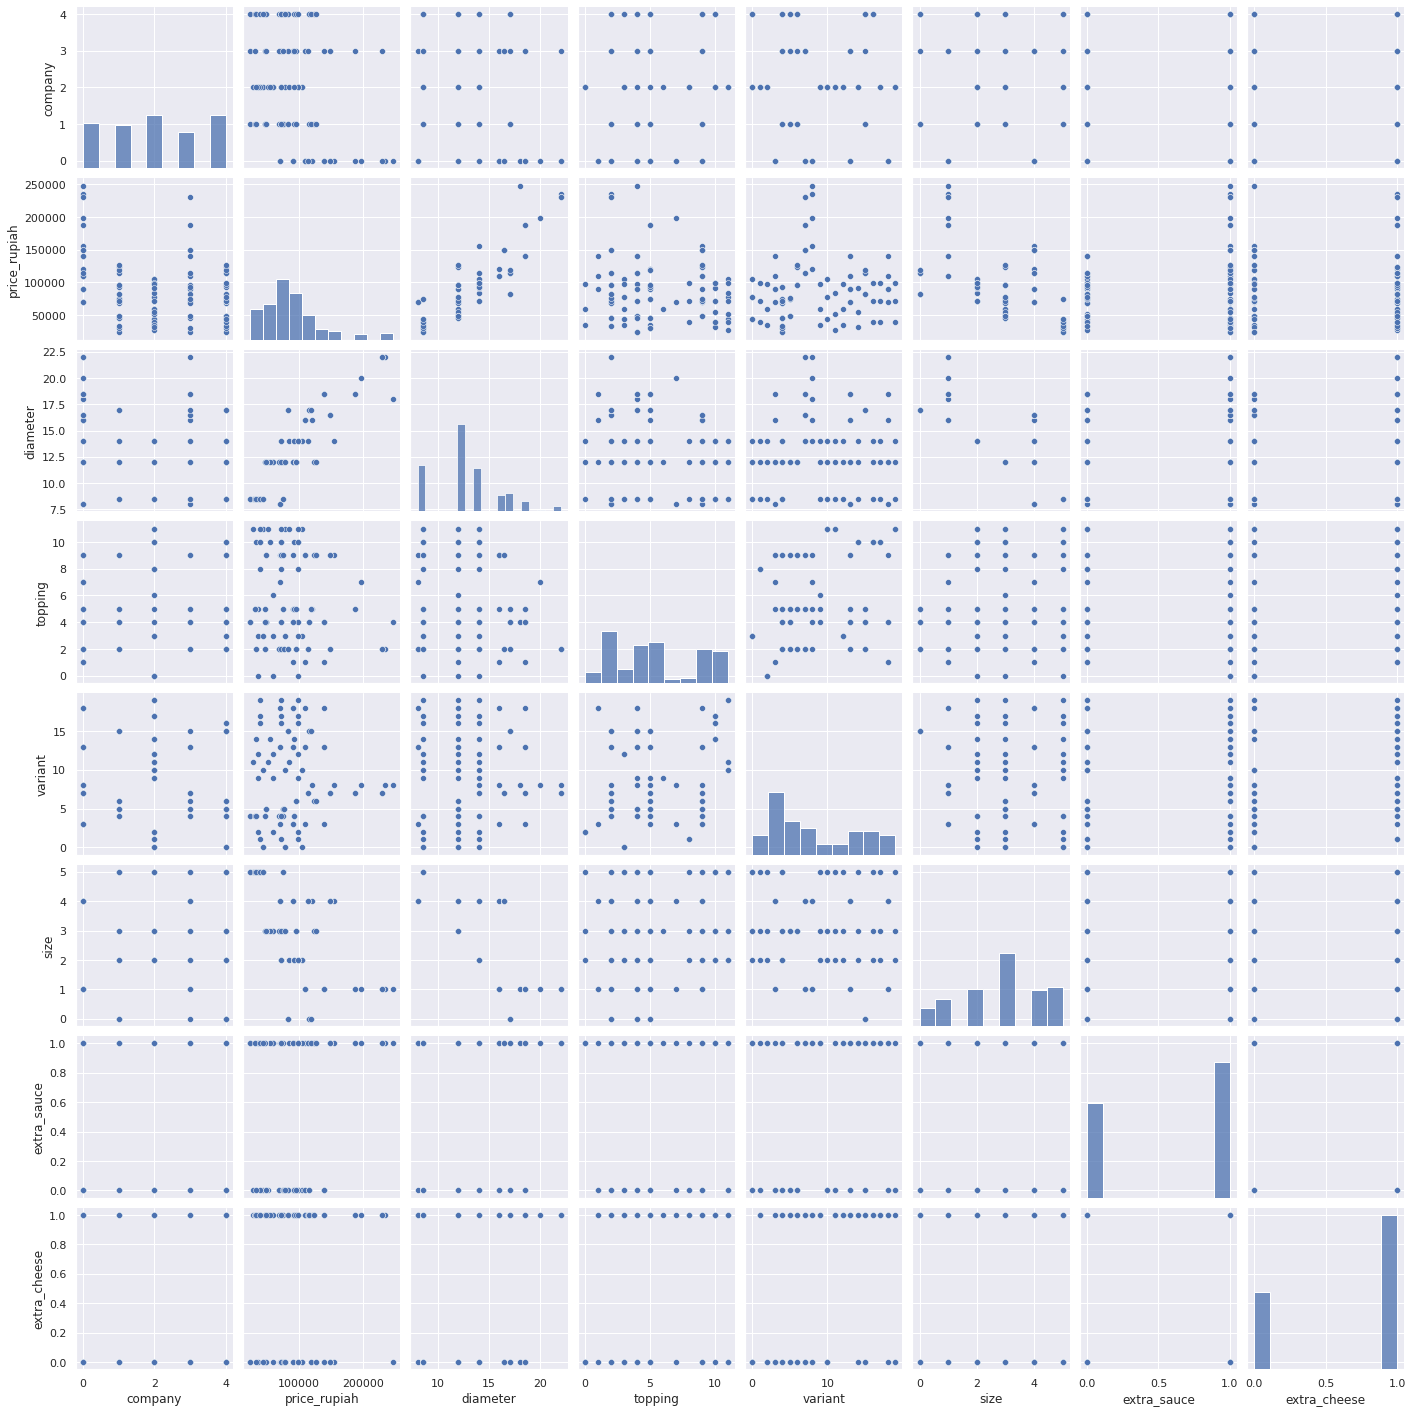

In [20]:
sns.pairplot(dataPizza)
plt.show()

# **Splitting the Data**

divide the data and split it using train test split module from sklearn.

In [21]:
X = dataPizza.drop(['price_rupiah'], axis=1)
y = dataPizza['price_rupiah']

In [22]:
trainX, testX, trainY, testY = train_test_split(
    X, y,
    test_size=.1,
    shuffle=False,
    random_state=0)

# **Regression with XGBRegressor**

since the data is for predicting numeric or price, from that, we can know, this data is a regression model, then i'm using XGBRegressor for that.

In [23]:
# XGBoost uses an internal data structure DMatrix - which optimizes both memory effieciency and speed
regressor = XGBRegressor(
    gamma=0,
    learning_rate=0.1,
    max_depth=6,
    n_estimators=1200,
    n_jobs=16,
    objective='reg:squarederror',
    subsample=0.8,
    scale_pos_weight=0,
    reg_alpha=0,
    reg_lambda=1,
    booster='gbtree'
)

model = regressor.fit(trainX, trainY)

**Pipelines** are a simple way to keep your data preprocessing and modeling code organized. Specifically, a pipeline bundles preprocessing and modeling steps so you can use the whole bundle as if it were a single step.

In [24]:
myPipeline = Pipeline(steps=[('model', model)])

# **Model Evaluate**

In [25]:
# predict X train
trainPredict = myPipeline.predict(trainX)

# predict X test  
testPredict = myPipeline.predict(testX)

In [26]:
# Train X 

# R Squared 
trainRsquared = metrics.r2_score(trainY, trainPredict)
print(f'R-Squared : {trainRsquared}')

# Mean Absolute Error
trainMAE = metrics.mean_absolute_error(trainY, trainPredict)
print(f'MAE : {trainMAE}')

#  Mean Squared Error
trainMSE = metrics.mean_squared_error(trainY, trainPredict)
print(f'MSE : {trainMSE}')

#  Root Mean Squared Error
trainRMSE = math.sqrt(metrics.mean_squared_error(trainY, trainPredict))
print(f'RMSE : {trainRMSE}')

# Median
trainM = metrics.median_absolute_error(trainY, trainPredict)
print(f'Median : {trainM}')

R-Squared : 0.9999999999992067
MAE : 0.0315362338362069
MSE : 0.0016744219023605872
RMSE : 0.040919700663135196
Median : 0.02734375


In [27]:
# Test X  

# R Squared 
testRsquared = metrics.r2_score(testY, testPredict)
print(f'R-Squared : {testRsquared}')

# Mean Absolute Error
testMAE = metrics.mean_absolute_error(testY, testPredict)
print(f'MAE : {testMAE}')

#  Mean Squared Error
testMSE = metrics.mean_squared_error(testY, testPredict)
print(f'MSE : {testMSE}')

#  Root Mean Squared Error
testRMSE = math.sqrt(metrics.mean_squared_error(testY, testPredict))
print(f'RMSE : {testRMSE}')

# Median
testM = metrics.median_absolute_error(testY, testPredict)
print(f'Median : {testM}')

R-Squared : 0.961350656843745
MAE : 3909.489483173077
MSE : 28029006.784460213
RMSE : 5294.2427961381045
Median : 2857.09375


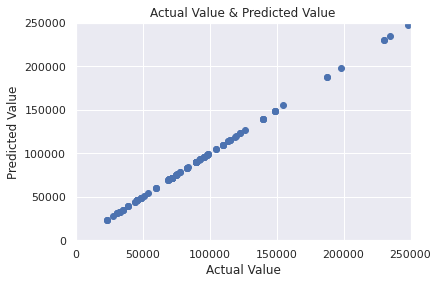

In [28]:
# Train Predicted Value & Actual Value
plt.scatter(trainY, trainPredict)
plt.title('Actual Value & Predicted Value')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.xlim(0, 250000)
plt.ylim(0, 250000)
plt.grid(True)
plt.show()

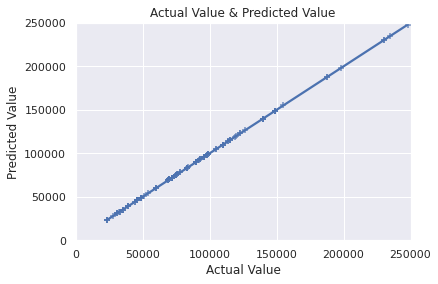

In [29]:
sns.regplot(x=trainY, y=trainPredict, marker="+")
plt.title('Actual Value & Predicted Value')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.xlim(0, 250000)
plt.ylim(0, 250000)
plt.grid(True)
plt.subplot()
plt.show()

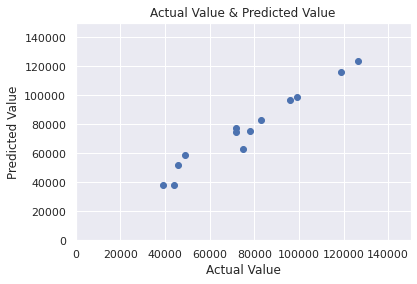

In [30]:
# Test Predicted Value & Actual Value
plt.scatter(testY, testPredict)
plt.title('Actual Value & Predicted Value')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.xlim(0, 150000)
plt.ylim(0, 150000)
plt.grid(True)
plt.show()

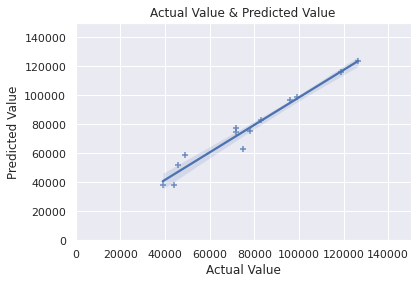

In [31]:
sns.regplot(x=testY, y=testPredict, marker="+")
plt.title('Actual Value & Predicted Value')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.xlim(0, 150000)
plt.ylim(0, 150000)
plt.grid(True)
plt.subplot()
plt.show()

# **Prediction**

output actual data with prediction data into csv file

In [32]:
trainOutput = pd.DataFrame({
    'Train Actual Price': trainY,
    'Train Predicted Price ': trainPredict})

trainOutput.to_csv('Train Prediction.csv', index=False)

In [33]:
testOutput = pd.DataFrame({
    'Test Actual Price': testY,
    'Test Predicted Price ': testPredict})

testOutput.to_csv('Test Prediction.csv', index=False)

In [34]:
trainPredictedOutput = pd.read_csv('./Train Prediction.csv')
trainPredictedOutput.head(10)

,Train Actual Price,Train Predicted Price
0,235000.0,234999.920
1,198000.0,198000.080
2,120000.0,120000.030
3,155000.0,154999.920
4,248000.0,247999.940
5,140000.0,139999.970
6,110000.0,109999.980
7,70000.0,70000.016
8,90000.0,89999.980
9,90000.0,90000.030


In [35]:
testPredictedOutput = pd.read_csv('./Test Prediction.csv')
testPredictedOutput.head(10)

,Test Actual Price,Test Predicted Price
0,119000.0,116049.350
1,126500.0,123642.910
2,75000.0,63111.516
3,46000.0,51736.145
4,72000.0,74386.740
5,49000.0,58892.480
6,83000.0,82999.940
7,96000.0,96497.266
8,39000.0,38158.566
9,72000.0,77156.780


# Going Fine and Nice !!!
# Great !!!